In [37]:
import pandas as pd

In [38]:
df=pd.read_csv("221IT085_URLfeaturedataset.csv")

In [39]:
df.columns

Index(['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count',
       'hyphen_count', 'underscore_count', 'slash_count',
       'question_mark_count', 'equal_count', 'at_count',
       ...
       'dns_record_check', 'media_links_ratio', 'connection_errors_ratio',
       'mx_servers_count', 'spf_record', 'domain_in_title', 'web_traffic',
       'google_index', 'page_rank', 'Label'],
      dtype='object', length=116)

In [40]:
df.isnull().sum()

full_url_length      0
hostname_length      0
ip_address_in_url    0
dot_count            0
hyphen_count         0
                    ..
domain_in_title      0
web_traffic          0
google_index         0
page_rank            0
Label                0
Length: 116, dtype: int64

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def check_duplicate_columns(df):
    duplicate_columns = []
    for idx, col in enumerate(df.columns):
        if df[col].nunique() == 1:  
            duplicate_columns.append((idx, col))  
    if duplicate_columns:
        print("Duplicate columns found:")
        for idx, col in duplicate_columns:
            print(f"Column Index: {idx}, Column Name: {col}")
        with open(f"221IT085-Duplicate-Column.txt", "w") as file:
            for idx, col in duplicate_columns:
                file.write(f"Column Index: {idx}, Column Name: {col}\n")
                
def check_duplicate_rows(df):
    # Find rows that are exact duplicates across all columns.
    duplicate_rows = df[df.duplicated(keep=False)]
    if not duplicate_rows.empty:
        duplicate_indices = duplicate_rows.index.tolist()
        print("Duplicate rows found at indices:", duplicate_indices)
        with open("221IT085-Duplicate-Row.txt", "w") as file:
            file.write("\n".join(map(str, duplicate_indices)))
    else:
        print("No duplicate rows found.")


In [42]:
check_duplicate_columns(df)

Duplicate columns found:
Column Index: 13, Column Name: tilde_count
Column Index: 27, Column Name: https_token
Column Index: 59, Column Name: brand_in_subdomain
Column Index: 85, Column Name: whois_registration
Column Index: 86, Column Name: domain_registration_length
Column Index: 87, Column Name: domain_age
Column Index: 95, Column Name: server_or_client_in_domain
Column Index: 97, Column Name: asn
Column Index: 98, Column Name: domain_activation_time
Column Index: 99, Column Name: domain_expiration_time


In [43]:
check_duplicate_rows(df)

Duplicate rows found at indices: [11, 15, 29, 32, 43, 45, 51, 55, 103, 107, 111, 113, 124, 125, 130, 178, 180, 187, 208, 209, 210, 215, 220, 248, 253, 267, 273, 286, 289, 307, 311, 315, 322, 352, 365, 373, 374, 375, 381, 412, 420, 422, 441, 457, 458, 479, 505, 512, 518, 538, 540, 542, 546, 547, 560, 562, 570, 581, 588, 602, 604, 619, 620, 621, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 647, 648, 649, 650, 651, 652, 653, 658, 660, 668, 670, 674, 676, 681, 685, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 744, 745, 746, 747, 749, 750, 752, 791, 815, 816, 851, 852, 853, 854, 855, 856, 859, 866, 879, 884, 902, 906, 924, 927, 933, 949, 963, 965, 970, 971, 1002, 1005, 1006, 1022, 1033, 1034, 1035, 1042, 1046, 1049, 1053, 1055, 1057, 1061, 1065, 1069, 1075, 1079, 1101, 1112, 1115

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def apply_standardization(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Get numerical columns as a list
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Standardization (Z-score normalization) applied to:", numerical_cols)
    return numerical_cols  # Return the list of normalized columns

df = pd.read_csv("221IT085_URLfeaturedataset.csv")
normalized_columns = apply_standardization(df)
df.to_csv("22IT085_Pre-processed_Dataset.csv", index=False)


Standardization (Z-score normalization) applied to: ['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count', 'hyphen_count', 'underscore_count', 'slash_count', 'question_mark_count', 'equal_count', 'at_count', 'ampersand_count', 'exclamation_count', 'space_count', 'tilde_count', 'comma_count', 'plus_count', 'asterisk_count', 'hashtag_count', 'dollar_count', 'percent_count', 'vertical_bar_count', 'colon_count', 'semicolon_count', 'www_occurrence', 'com_occurrence', 'http_occurrence', 'double_slash_occurrence', 'https_token', 'digit_ratio_full_url', 'digit_ratio_hostname', 'punycode_usage', 'port_number_presence', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomains', 'number_of_subdomains', 'prefix_suffix_hyphen', 'random_domain_indicator', 'url_shortening_service', 'path_extension_check', 'redirection_count', 'external_redirection_count', 'word_count_url', 'word_count_hostname', 'word_count_path', 'char_repeat_url', 'char_repeat_hostname', 'char_repeat_path', 'shorte

Heatmap saved


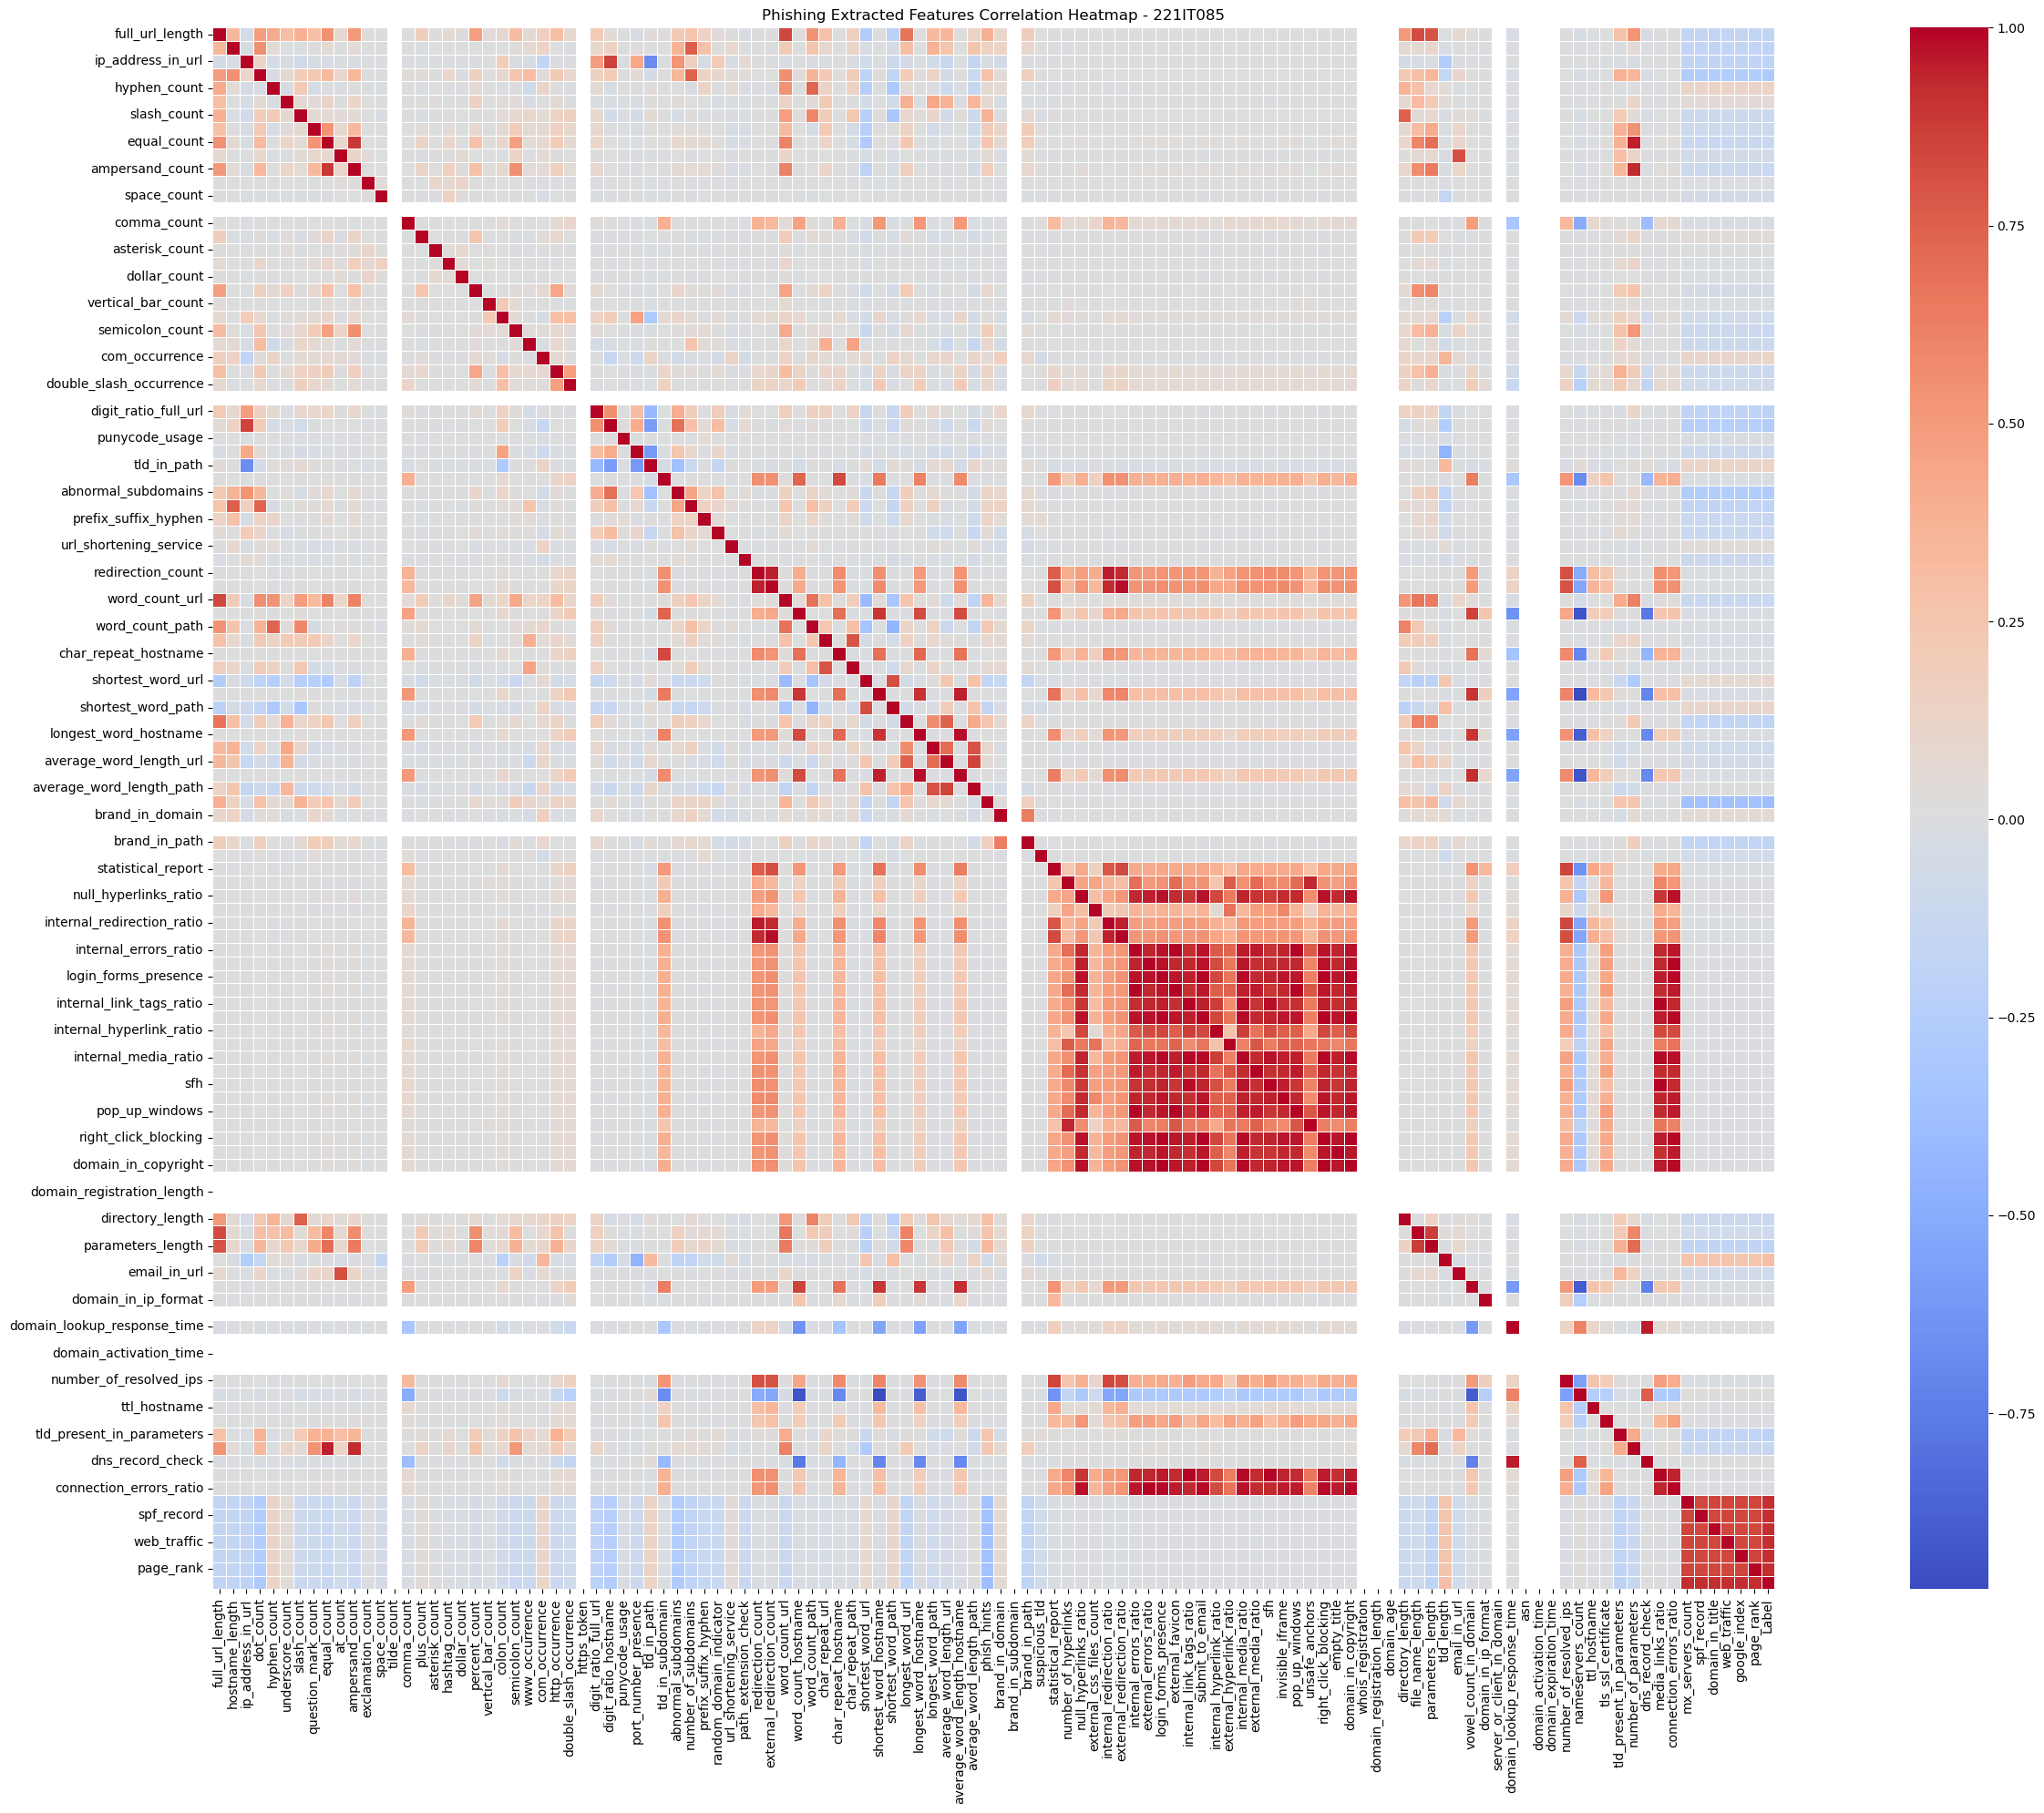

In [46]:
def generate_heatmap(df):
    df_numeric = df.select_dtypes(include=[float, int])
    correlation_matrix = df_numeric.corr()
    fig, ax = plt.subplots(1, 1, figsize=(30, 20))
    sns.heatmap(
        correlation_matrix, annot=False, cmap="coolwarm",
        cbar=True, linewidths=0.5, square=True, ax=ax
    )
    ax.set_title("Phishing Extracted Features Correlation Heatmap - 221IT085")
    plt.tight_layout()
    plt.savefig("221IT085_Heatmap.jpeg", format="jpeg", dpi=300)
    print(f"Heatmap saved")
    
    plt.show()
df=pd.read_csv("22IT085_Pre-processed_Dataset_1.csv")
generate_heatmap(df)

In [33]:
df = pd.read_csv("22IT085_Pre-processed_Dataset.csv")
df.head()

,URL,full_url_length,hostname_length,ip_address_in_url,dot_count,hyphen_count,underscore_count,slash_count,question_mark_count,equal_count,...,dns_record_check,media_links_ratio,connection_errors_ratio,mx_servers_count,spf_record,domain_in_title,web_traffic,google_index,page_rank,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,3.923264,-0.704099,-0.120419,2.599770,1.185287,2.740166,4.734477,1.636169,3.889871,...,0.011044,-0.00448,-0.004633,-1.458898,-1.458353,-1.458298,-1.458339,-1.458644,-1.458627,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0.681338,-0.187242,-0.120419,1.939541,0.360320,0.462487,0.974386,-0.314880,1.799313,...,0.011044,-0.00448,-0.004633,-1.458898,-1.458353,-1.458298,-1.458339,-1.458644,-1.458627,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,2.842622,-0.101100,-0.120419,3.259998,-0.052163,-0.296740,5.361159,-0.314880,-0.291246,...,0.011044,-0.00448,-0.004633,-1.458898,-1.458353,-1.458298,-1.458339,-1.458644,-1.458627,bad
3,mail.printakid.com/www.online.americanexpress....,0.208557,0.071186,-0.120419,2.599770,-0.464646,-0.296740,-0.278978,-0.314880,-0.291246,...,0.011044,-0.00448,-0.004633,-1.458898,-1.458353,-1.458298,-1.458339,-1.458644,-1.458627,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,1.469306,0.157328,-0.120419,-0.701371,-0.052163,-0.296740,4.734477,1.636169,-0.291246,...,0.011044,-0.00448,-0.004633,-1.458898,-1.458353,-1.458298,-1.458339,-1.458644,-1.458627,bad


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def apply_standardization(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Get numerical columns
    scaler = StandardScaler()
    # Apply standardization (Z-score normalization)
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    # Round to 2 decimal places
    df[numerical_cols] = df[numerical_cols].round(2)
    print("Standardization (Z-score normalization) applied to:", numerical_cols)
    return numerical_cols  # Return the list of normalized columns

df = pd.read_csv("221IT085_URLfeaturedataset.csv")
normalized_columns = apply_standardization(df)

# Save as a gzip-compressed CSV file
df.to_csv("22IT085_Pre-processed_Dataset_1.csv.gz", index=False, compression="gzip")


Standardization (Z-score normalization) applied to: ['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count', 'hyphen_count', 'underscore_count', 'slash_count', 'question_mark_count', 'equal_count', 'at_count', 'ampersand_count', 'exclamation_count', 'space_count', 'tilde_count', 'comma_count', 'plus_count', 'asterisk_count', 'hashtag_count', 'dollar_count', 'percent_count', 'vertical_bar_count', 'colon_count', 'semicolon_count', 'www_occurrence', 'com_occurrence', 'http_occurrence', 'double_slash_occurrence', 'https_token', 'digit_ratio_full_url', 'digit_ratio_hostname', 'punycode_usage', 'port_number_presence', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomains', 'number_of_subdomains', 'prefix_suffix_hyphen', 'random_domain_indicator', 'url_shortening_service', 'path_extension_check', 'redirection_count', 'external_redirection_count', 'word_count_url', 'word_count_hostname', 'word_count_path', 'char_repeat_url', 'char_repeat_hostname', 'char_repeat_path', 'shorte

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def apply_standardization(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Get numerical columns
    scaler = StandardScaler()
    # Apply standardization (Z-score normalization)
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    # Round to 2 decimal places
    df[numerical_cols] = df[numerical_cols].round(2)
    print("Standardization (Z-score normalization) applied to:", numerical_cols)
    return numerical_cols  # Return the list of normalized columns

df = pd.read_csv("221IT085_URLfeaturedataset.csv")
normalized_columns = apply_standardization(df)

# Save as a CSV file without compression
df.to_csv("22IT085_Pre-processed_Dataset.csv", index=False)


Standardization (Z-score normalization) applied to: ['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count', 'hyphen_count', 'underscore_count', 'slash_count', 'question_mark_count', 'equal_count', 'at_count', 'ampersand_count', 'exclamation_count', 'space_count', 'tilde_count', 'comma_count', 'plus_count', 'asterisk_count', 'hashtag_count', 'dollar_count', 'percent_count', 'vertical_bar_count', 'colon_count', 'semicolon_count', 'www_occurrence', 'com_occurrence', 'http_occurrence', 'double_slash_occurrence', 'https_token', 'digit_ratio_full_url', 'digit_ratio_hostname', 'punycode_usage', 'port_number_presence', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomains', 'number_of_subdomains', 'prefix_suffix_hyphen', 'random_domain_indicator', 'url_shortening_service', 'path_extension_check', 'redirection_count', 'external_redirection_count', 'word_count_url', 'word_count_hostname', 'word_count_path', 'char_repeat_url', 'char_repeat_hostname', 'char_repeat_path', 'shorte

Heatmap saved


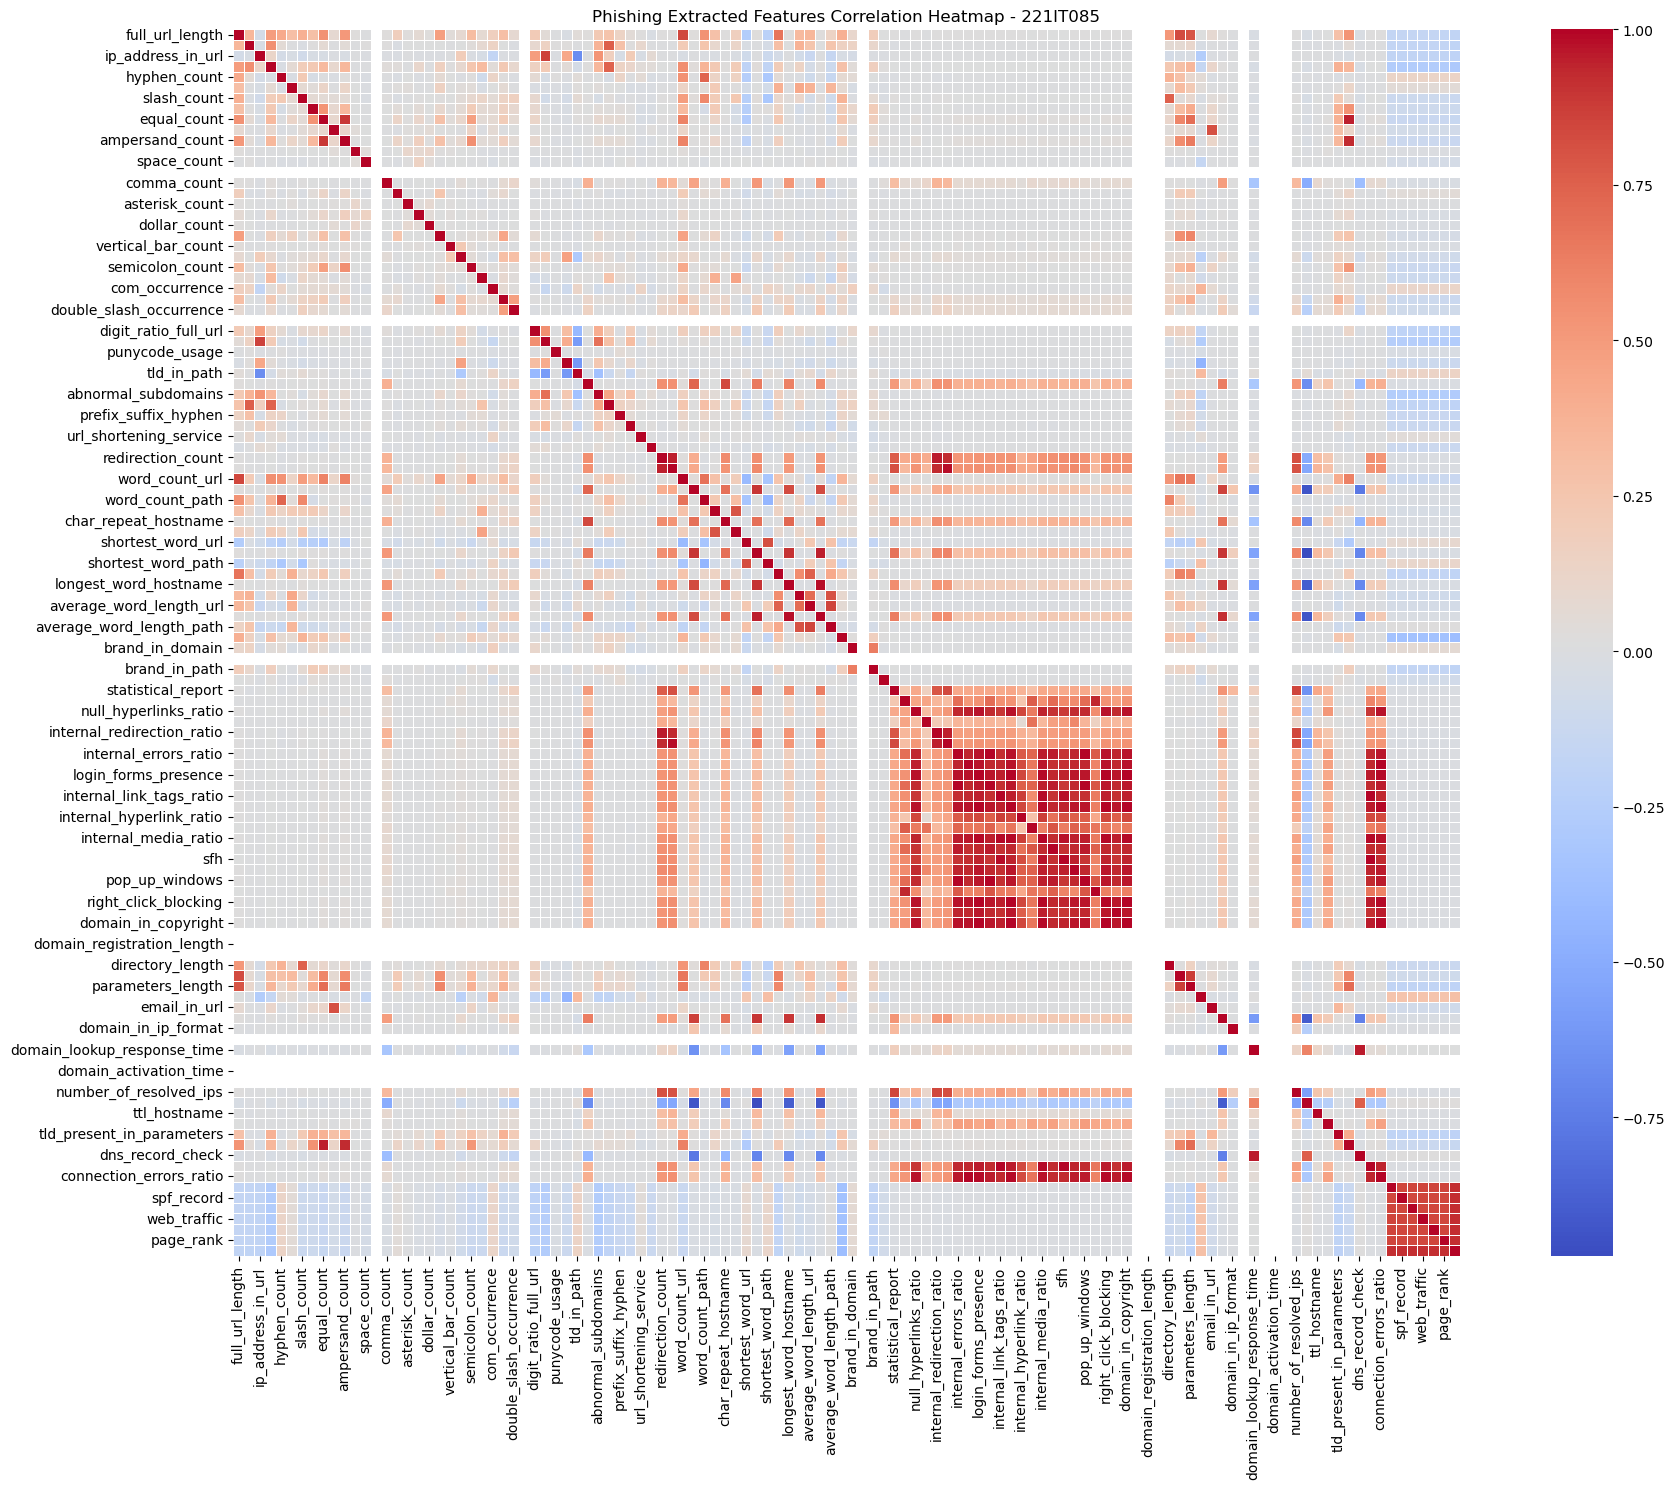

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def generate_heatmap(df):
    df.columns = df.columns.astype(str)  # Ensure column names are strings
    df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
    correlation_matrix = df_numeric.corr()

    fig, ax = plt.subplots(figsize=(20, 15))  # Adjust figure size
    sns.heatmap(
        correlation_matrix, annot=False, cmap="coolwarm",
        cbar=True, linewidths=0.5, square=True, ax=ax
    )

    # Truncate long y-axis labels
    #truncated_labels = truncate_labels(ax.get_yticklabels(), max_length=15)
    #ax.set_yticklabels(truncated_labels, rotation=0, fontsize=12)

    ax.set_title("Phishing Extracted Features Correlation Heatmap - 221IT085")

    plt.tight_layout()
    plt.savefig("221IT085_Heatmap.jpeg", format="jpeg", dpi=300)
    print("Heatmap saved")

    plt.show()

df = pd.read_csv("22IT085_Pre-processed_Dataset_1.csv")
generate_heatmap(df)


In [51]:
print(df.dtypes)  # Check data types
df.columns = df.columns.astype(str)  # Ensure column names are strings
df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
correlation_matrix = df_numeric.corr()
print(df_numeric.columns)  # Check which columns are selected


full_url_length      float64
hostname_length      float64
ip_address_in_url    float64
dot_count            float64
hyphen_count         float64
                      ...   
domain_in_title      float64
web_traffic          float64
google_index         float64
page_rank            float64
Label                  int64
Length: 116, dtype: object
Index(['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count',
       'hyphen_count', 'underscore_count', 'slash_count',
       'question_mark_count', 'equal_count', 'at_count',
       ...
       'dns_record_check', 'media_links_ratio', 'connection_errors_ratio',
       'mx_servers_count', 'spf_record', 'domain_in_title', 'web_traffic',
       'google_index', 'page_rank', 'Label'],
      dtype='object', length=116)


In [52]:
print(correlation_matrix["Label"])

full_url_length     -0.177309
hostname_length     -0.181963
ip_address_in_url   -0.189800
dot_count           -0.293360
hyphen_count         0.134449
                       ...   
domain_in_title      0.919619
web_traffic          0.919645
google_index         0.919837
page_rank            0.919826
Label                1.000000
Name: Label, Length: 116, dtype: float64


In [53]:
print(correlation_matrix.columns)  # Ensure "Label" appears


Index(['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count',
       'hyphen_count', 'underscore_count', 'slash_count',
       'question_mark_count', 'equal_count', 'at_count',
       ...
       'dns_record_check', 'media_links_ratio', 'connection_errors_ratio',
       'mx_servers_count', 'spf_record', 'domain_in_title', 'web_traffic',
       'google_index', 'page_rank', 'Label'],
      dtype='object', length=116)


Heatmap saved


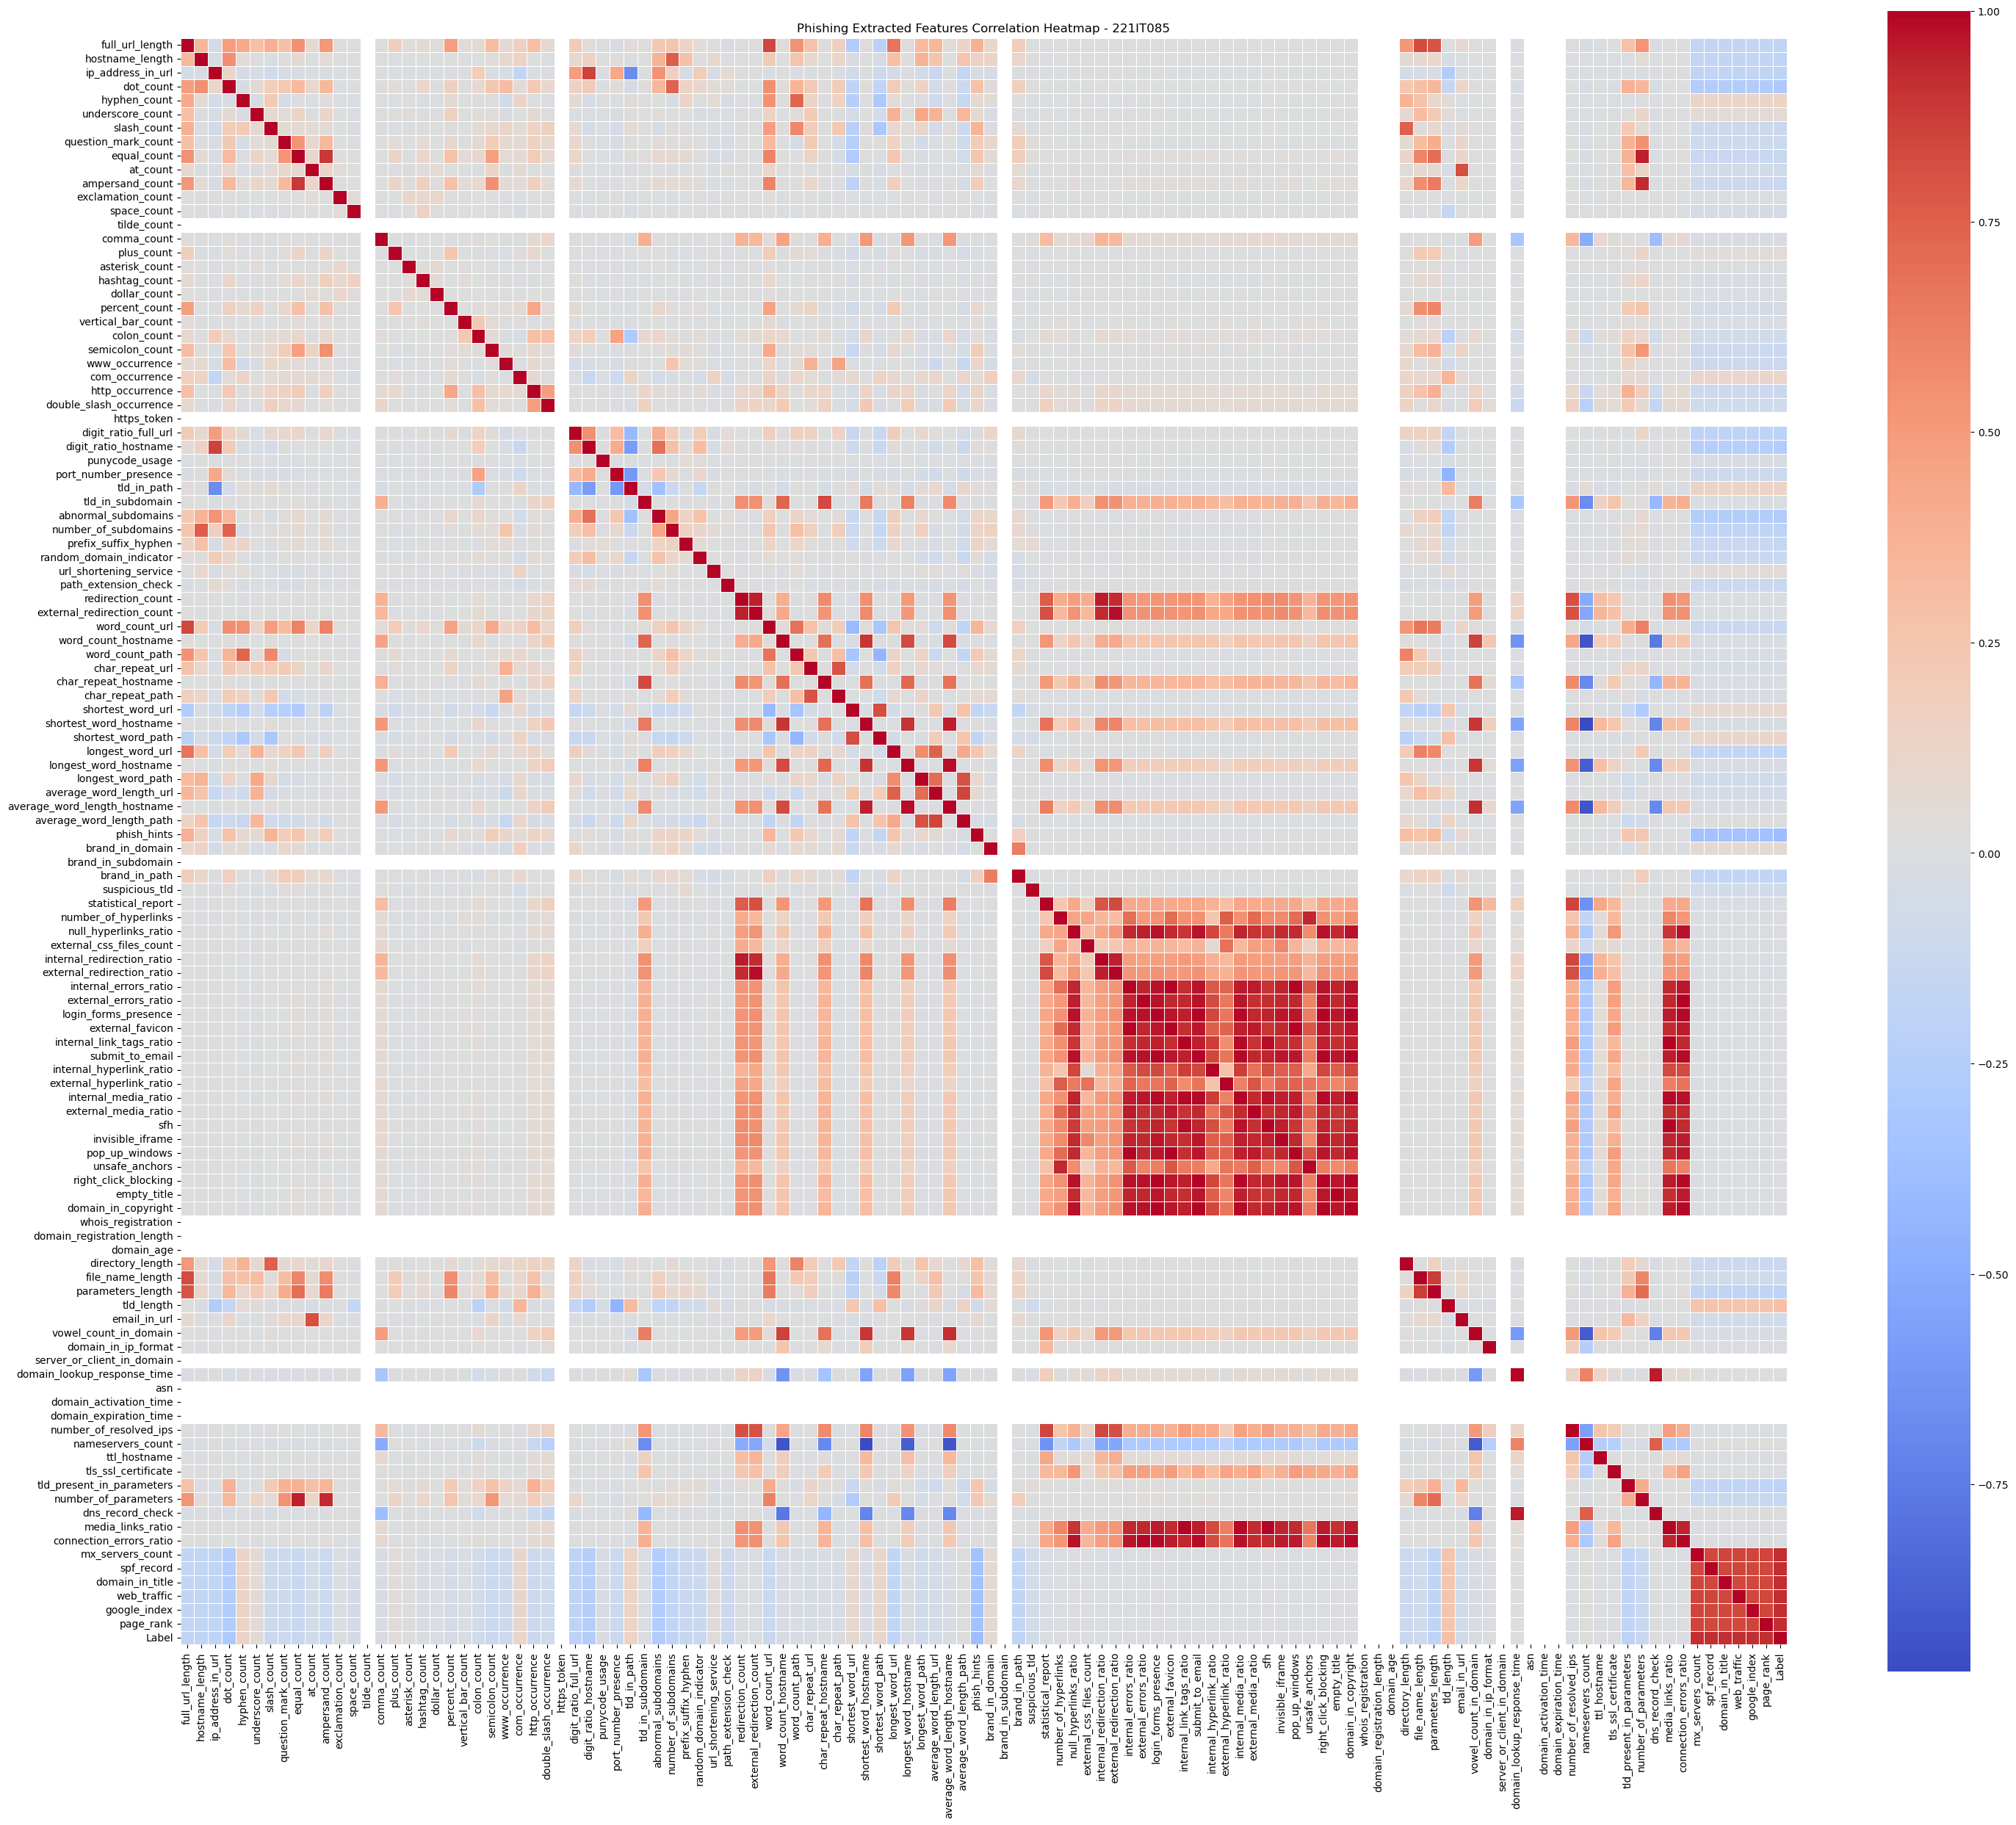

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def generate_heatmap(df):
    df.columns = df.columns.astype(str)  # Ensure column names are strings
    df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
    correlation_matrix = df_numeric.corr()

    fig, ax = plt.subplots(figsize=(30,25))  # Adjust figure size
    sns.heatmap(
        correlation_matrix, annot=False, cmap="coolwarm",
        cbar=True, linewidths=0.5, square=True, ax=ax
    )

    # Truncate long y-axis labels
    #truncated_labels = truncate_labels(ax.get_yticklabels(), max_length=15)
    #ax.set_yticklabels(truncated_labels, rotation=0, fontsize=12)

    ax.set_title("Phishing Extracted Features Correlation Heatmap - 221IT085")

    plt.tight_layout()
    plt.savefig("221IT085_Heatmap.jpeg", format="jpeg", dpi=300)
    print("Heatmap saved")

    plt.show()

df = pd.read_csv("22IT085_Pre-processed_Dataset_1.csv")
generate_heatmap(df)


Heatmap saved


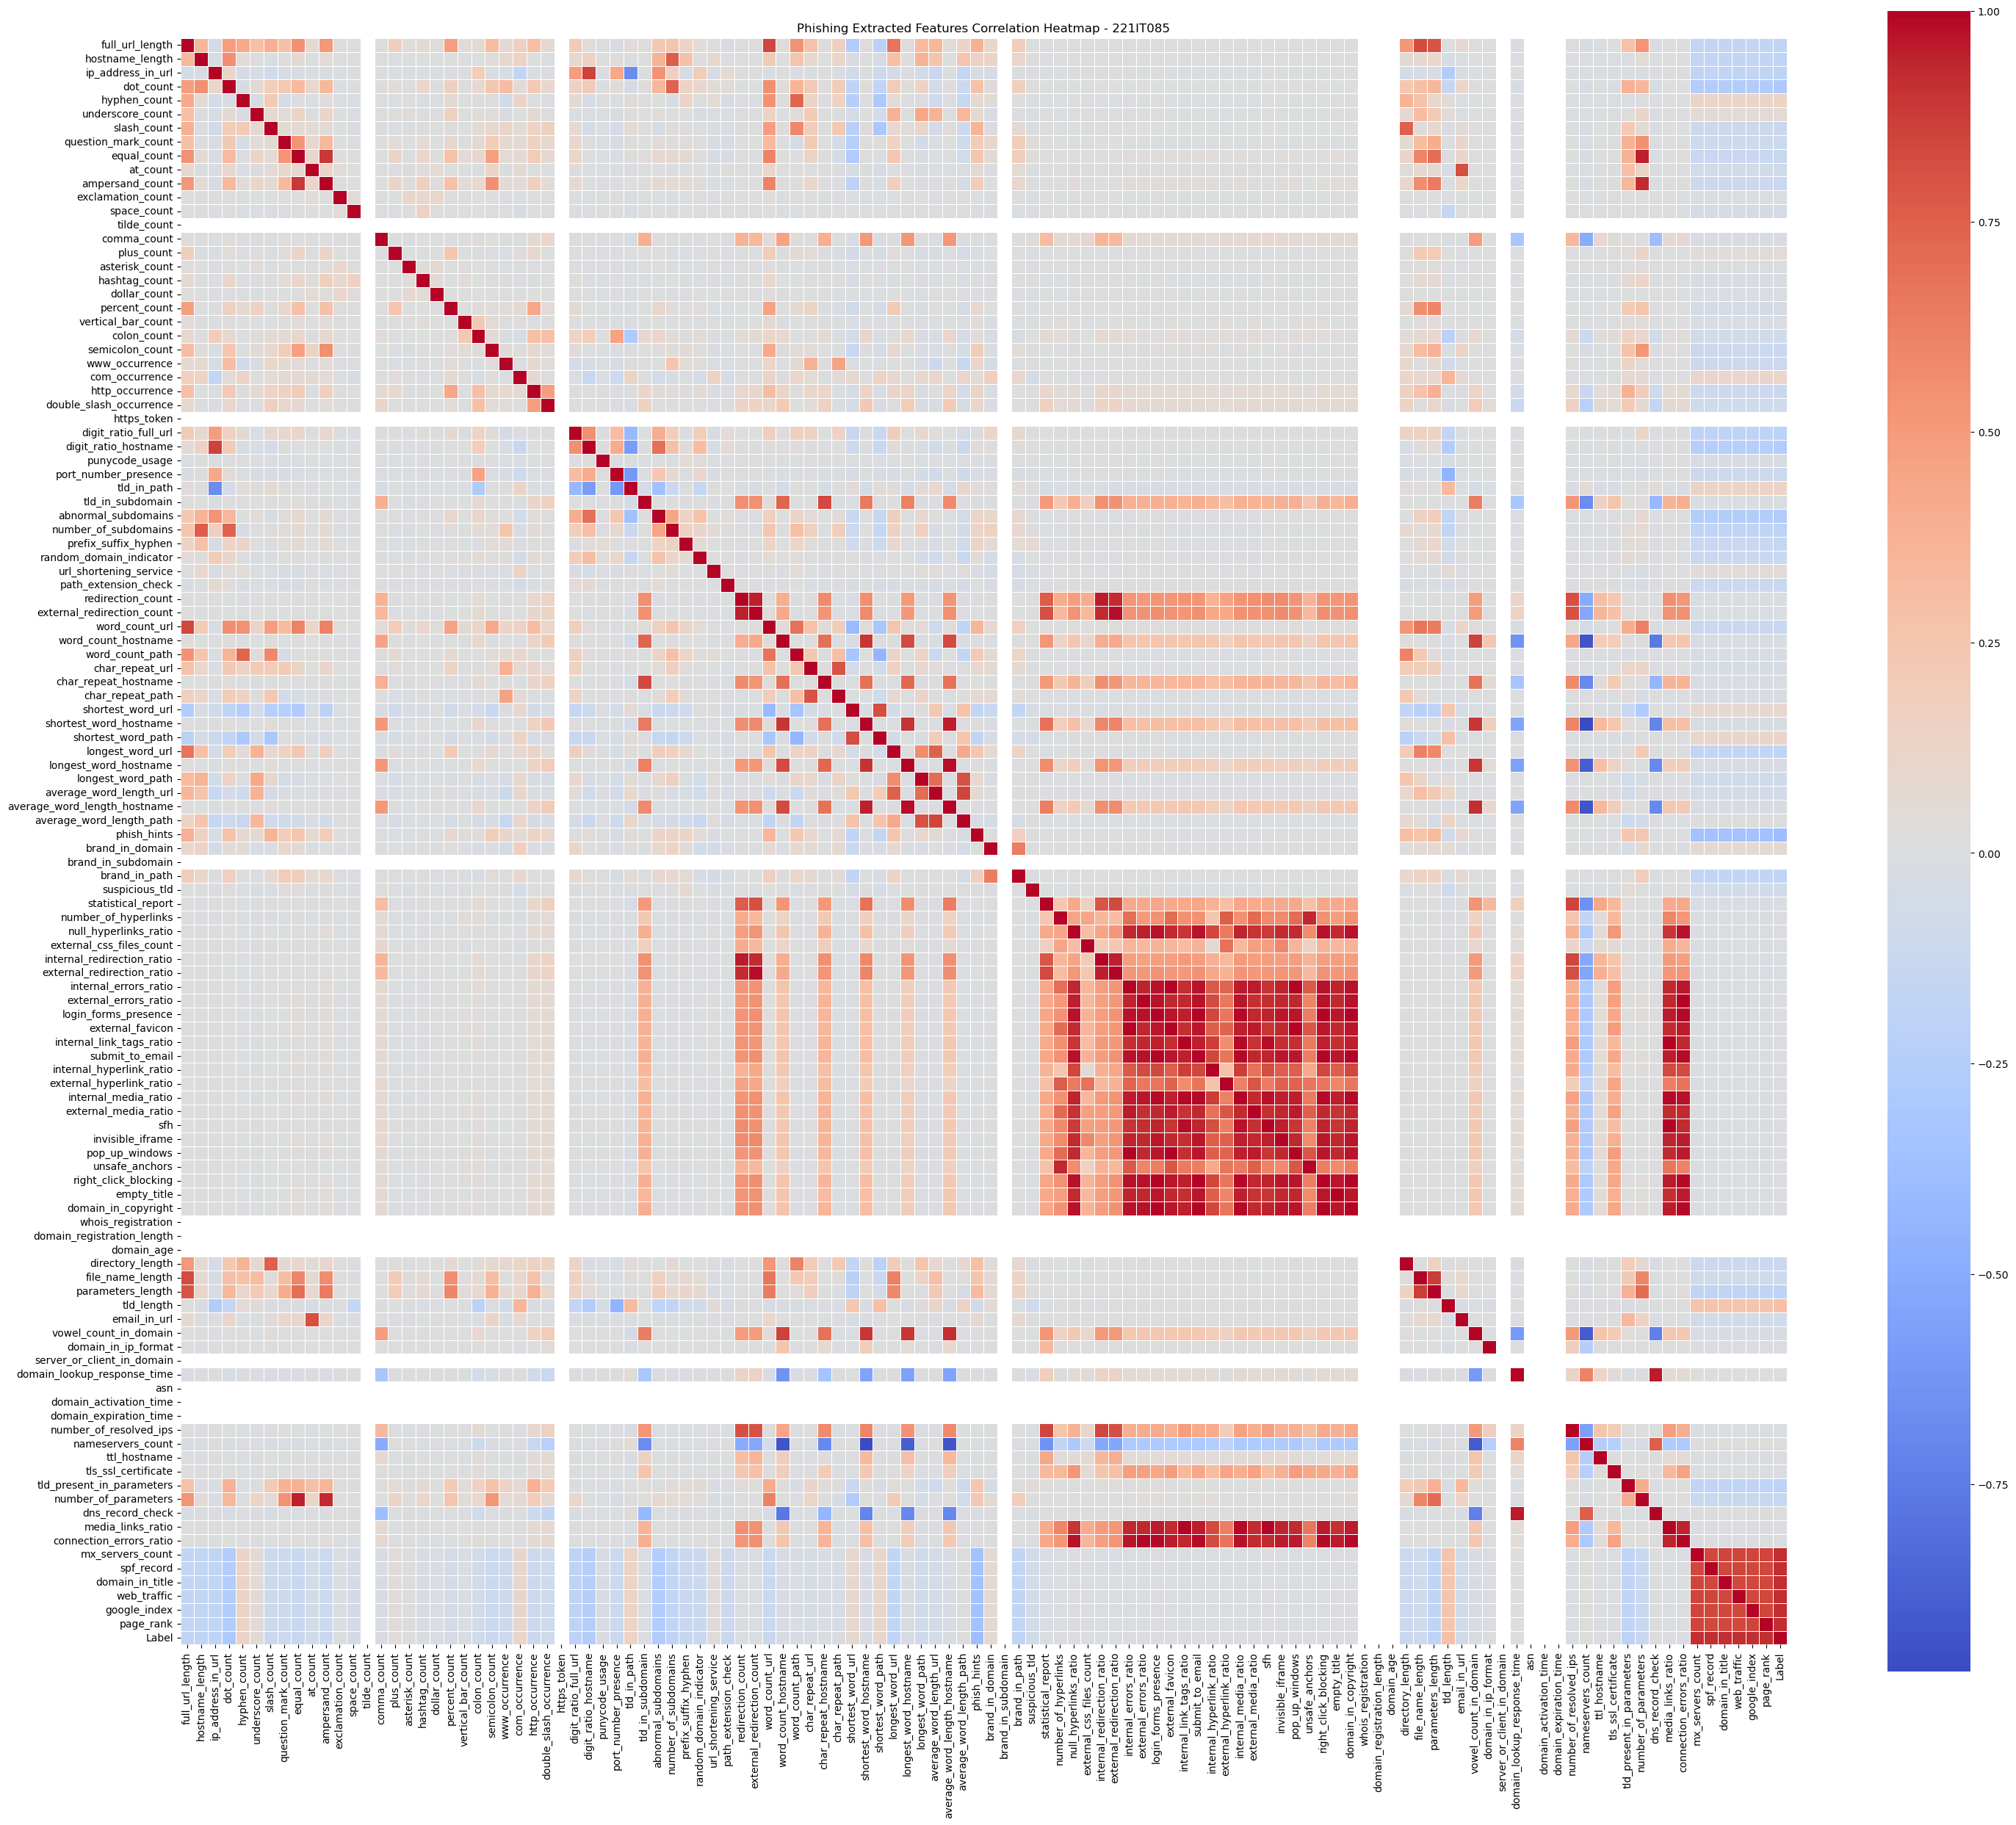

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def generate_heatmap(df):
    df.columns = df.columns.astype(str)  # Ensure column names are strings
    df_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
    correlation_matrix = df_numeric.corr()

    fig, ax = plt.subplots(figsize=(30,25))  # Adjust figure size
    sns.heatmap(
        correlation_matrix, annot=False, cmap="coolwarm",
        cbar=True, linewidths=0.5, square=True, ax=ax
    )

    # Truncate long y-axis labels
    #truncated_labels = truncate_labels(ax.get_yticklabels(), max_length=15)
    #ax.set_yticklabels(truncated_labels, rotation=0, fontsize=12)

    ax.set_title("Phishing Extracted Features Correlation Heatmap - 221IT085")

    plt.tight_layout()
    plt.savefig("221IT085_Heatmap.jpeg", format="jpeg", dpi=500)
    print("Heatmap saved")

    plt.show()

df = pd.read_csv("22IT085_Pre-processed_Dataset_1.csv")
generate_heatmap(df)
